In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [116]:
train = pd.read_csv('data_train.csv')

In [104]:
import seaborn as sns

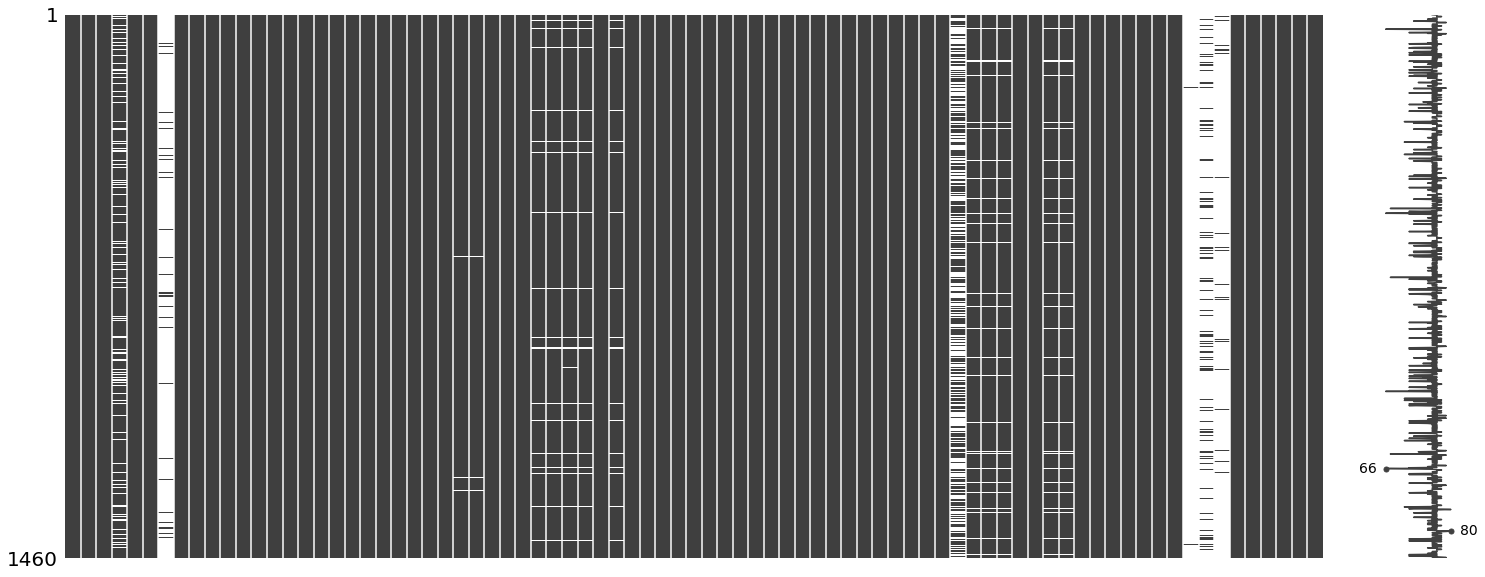

In [117]:
import missingno as mg
mg.matrix(train)

In [3]:
test = pd.read_csv('data_test.csv')

In [4]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### Handling the missing values 

In [5]:
#Train Data Set
drop_columns= []
for col in train.columns:
    if train[col].isna().sum() > 300:
        drop_columns.append(col)
print(drop_columns)

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [139]:
dd = train[drop_columns].isna().sum()
dd.info()

AttributeError: 'Series' object has no attribute 'info'

In [130]:
drop_columns =list(drop_columns)

In [142]:
dd.index

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'YrSold'], dtype='object')

Text(0.5, 1.0, 'Features with more than 200 NULL values')

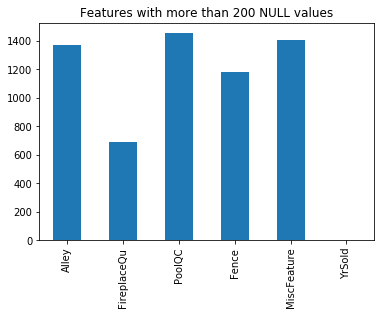

In [145]:
dd.plot.bar()
plt.title('Features with more than 200 NULL values')

In [6]:
drop_columns

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [7]:
drop_columns.append('YrSold')

In [8]:
train.drop(columns = drop_columns, inplace = True)

### Filling the missing values with the mean values

In [9]:
for col in train.columns:
    if train[col].dtype == 'O':
        train[col].fillna(train[col].value_counts().sort_values(ascending = True).index[-1], inplace = True)
    else:
        train[col].fillna(np.round(train[col].mean(), 0), inplace = True)

### Handling missing values for test data

In [10]:
test.drop(columns = drop_columns, inplace = True)

In [11]:
for col in test.columns:
    if test[col].dtype == 'O':
        test[col].fillna(test[col].value_counts().sort_values(ascending = True).index[-1], inplace = True)
    else:
        test[col].fillna(np.round(test[col].mean(), 0), inplace = True)

### Baseline model 

In [12]:
data = train.select_dtypes(include= ['object'])

In [13]:
for col in data.columns:
    print(data[col].unique())
    

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Pave' 'Grvl']
['Reg' 'IR1' 'IR2' 'IR3']
['Lvl' 'Bnk' 'Low' 'HLS']
['AllPub' 'NoSeWa']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['Gtl' 'Mod' 'Sev']
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
oe = OrdinalEncoder()

In [16]:
data_new = oe.fit_transform(data)

In [17]:
new_data = pd.DataFrame(data_new, columns = data.columns)

In [18]:
train[new_data.columns] = new_data

In [19]:
data = test.select_dtypes(include= ['object'])

In [20]:
data_new = oe.fit_transform(data)

In [21]:
new_data = pd.DataFrame(new_data, columns =  data.columns)

In [22]:
test[new_data.columns] = new_data

### Baseline model

In [25]:
train.drop(columns= ['Id'], inplace = True)

In [27]:
train.columns[-1]

'SalePrice'

In [28]:
trainX = train.drop(columns = ["SalePrice"])

In [33]:
trainY = train.SalePrice

In [35]:
test.drop(columns= ['Id'], inplace = True)

In [30]:
from sklearn.tree import DecisionTreeRegressor

In [31]:
de = DecisionTreeRegressor()

In [32]:
de.fit(trainX, trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [36]:
testY = de.predict(test)

In [38]:
de.score(test, testY)

1.0

In [39]:
from sklearn.metrics import f1_score, jaccard_score, accuracy_score

In [41]:
test.shape

(1459, 73)

In [42]:
testY.shape

(1459,)

### Feature Selection based on the DecisionTree regressor

In [51]:
series_data =pd.Series (de.feature_importances_, index = trainX.columns)

In [54]:
train_col = series_data.sort_values(ascending=False).index[:5]

In [55]:
de.fit(train[train_col], trainY)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [ ]:
train.plot.scatter(x= 'GrLivArea', y = 'SalePrice')

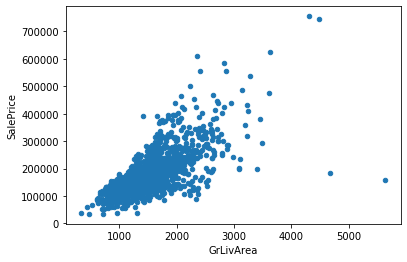

In [57]:
train.plot.scatter(x= 'GrLivArea', y = 'SalePrice')

In [59]:
ss = de.predict(test[train_col])

In [72]:
submission_data = pd.Series(ss, index = testa.Id)

In [78]:
data = submission_data.to_csv(index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [102]:

fp = open("submission_data.xlsx","w",encoding = "utf-8")
fp.write('submission_data.xlsx')
fp.close()

In [90]:
submission_data.to_excel('submission_data.xlsx')

In [94]:
submission_data = pd.read_excel('submission_data.xlsx', names = ['id','SalePrice'])

In [112]:
testY.shape

(1459,)